# Online store A/B testing

This is a study project dedicated to `Making Business Decisions Based on Data` theme from `Yandex.Practicum Data Analysis` course.

**Key words**: hypotheses prioritization, hypotheses testing, A/B testing.
**Libraries used**: pandas, matplotlib, scipy, seaborn

## Table of contents

- [Project's goal](#goal)
- [Prioritizing hypotheses](#hypotheses)
- [A/B Test analysis](#ab)
    - [General information](#general)
    - [Data preprocessing](#dp)
    - [Analyzing metrics](#am)
    - [Measuring statistical significance](#ss)
- [Conclusion](#conclusion)

## Project's goal<a id='goal'></a>

The project's goal is to help big online store boost revenue. Analysts and marketing department have compiled a list of hypotheses, that might be useful.

### We have the following data:
- list of hypotheses
- orders and visits

### We are going to:
- prioritize hypotheses, 
- launch an A/B test, 
- analyze the results.

## Prioritizing Hypotheses<a id='hypotheses'></a>

### General information

#### Let's check the `hypotheses` dataset:


In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# function to get basic info about the dataset
def get_info(df):

    print("Head:")
    display(df.head())
    print()
    
    print("Info:")
    display(df.info())
    print()
    
    print("Description of quantitative parameters:")
    display(df.describe())
    print()
    
    print("Description of categorical parameters:")
    display(df.describe(include='object'))
    print()
    
    print("Columns with NaN values:")
    display(df.isna().sum())
    print()
    
    print("Shape:")
    display(df.shape)
    print()
    
    print("Number of duplicated rows:")
    display(df.duplicated().sum())        

In [3]:
from io import BytesIO
import requests
spreadsheet_id = '18moPloQMexfywEDqYHMnZpGrrUBkpYidQjNPX1ekSSk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
hypotheses = pd.read_csv(BytesIO(r.content))

get_info(hypotheses)

Head:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None


Description of quantitative parameters:


,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000



Description of categorical parameters:


,Hypothesis
count,9
unique,9
top,Add product recommendation blocks to the store...
freq,1



Columns with NaN values:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


Shape:


(9, 5)


Number of duplicated rows:


0

#### The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

- `Hypotheses` — brief descriptions of the hypotheses
- `Reach` — user reach, on a scale of one to ten
- `Impact` — impact on users, on a scale of one to ten
- `Confidence` — confidence in the hypothesis, on a scale of one to ten
- `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

No data preprocessing needed.

#### Let's apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [4]:
pd.options.display.max_colwidth
pd.options.display.max_colwidth = 120

In [5]:
hypotheses['ICE'] = round((hypotheses['Impact'] + hypotheses['Confidence']) / hypotheses['Effort'], 2)
hypotheses.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,3.67
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,3.60
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,3.33
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,3.00
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,3.00
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,2.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,0.90
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,0.75


`ICE` prioritization:

1. #6 Show banners with current offers and sales on the main page. This will boost conversion	
2. #8 Launch a promotion that gives users discounts on their birthdays
3. #2 Add product recommendation blocks to the store's site. This will increase conversion and average purchase size


#### Now we will apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.


In [6]:
hypotheses['RICE'] = round((hypotheses['Reach'] + hypotheses['Impact'] + hypotheses['Confidence']) / hypotheses['Effort'], 2)
hypotheses.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,3.33,6.00
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,3.67,5.33
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,2.00,5.00
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,3.00,5.00
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,3.60,3.80
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,3.00,3.50
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,2.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,0.75,1.75
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,0.90,1.10


`RICE` prioritization:
1. #2 Add product recommendation blocks to the store's site. This will increase conversion and average purchase size	
2. #6	Show banners with current offers and sales on the main page. This will boost conversion
3. #4	Change the background color on the main page. This will increase user engagement


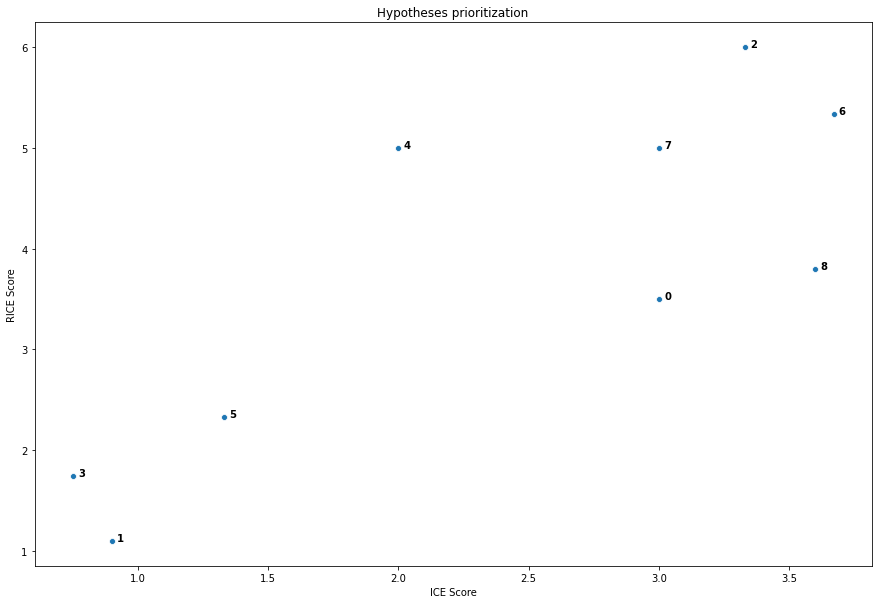

In [7]:
size = (15, 10)
fig, ax = plt.subplots(figsize=size)
fig = sns.scatterplot(x=hypotheses['ICE'], y=hypotheses['RICE'])
plt.title('Hypotheses prioritization')
plt.xlabel('ICE Score')
plt.ylabel('RICE Score')
#plt.show()

for line in range(0, hypotheses.shape[0]):
     plt.text(hypotheses['ICE'][line]+0.02, hypotheses['RICE'][line], 
     hypotheses.index[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

#### Conclusion

1. We can notice that **hypothesis #6**	"Show banners with current offers and sales on the main page. This will boost conversion" ranks 1st and 2d in `ICE` and `RICE` prioritization. This hypothesis has a medium Reach value, as not all the customers visit the main page. Though it impacts most of the users it reaches, as offers and sales attract user's interest.
2. **Hypothesis #8**	"Launch a promotion that gives users discounts on their birthdays" has a high Impact, that's why it ranks high in `ICE` priotitization, but due to the low Reach it is only 5th according to `RICE`.
3. **Hypothesis #2** "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size" ranks 3d acoording to `ICE`, but 1st - to `RICE`, cause it's Reach is very high, but Impact is moderate.



We would recommend **to test the 6th hypothesis first.**

## A/B Test Analysis<a id='ab'></a>

### General Information<a id='general'></a>

#### We've carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv. Let's check out the data:

In [8]:
spreadsheet_id = '1EYhW8mDnp1DIHcCqClPObNa2UwlCwgkBOxZS3zcXIGY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
orders = pd.read_csv(BytesIO(r.content))

get_info(orders)

Head:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None


Description of quantitative parameters:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000



Description of categorical parameters:


,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640



Columns with NaN values:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Shape:


(1197, 5)


Number of duplicated rows:


0

Orders
- `transaction_id` — order identifier
- `visitor_id` — identifier of the user who placed the order
- `date` — of the order
- `revenue` — from the order
- `group` — the A/B test group that the user belongs to


In [9]:
orders.set_axis(['order_id', 'visitor_id', 'date', 'revenue', 'group'], axis=1, inplace=True)

In [10]:
spreadsheet_id = '1tH5W4vs7saoHII-wndhVzISiL1TlSDjd6aEA94hwHGs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
visits = pd.read_csv(BytesIO(r.content))

get_info(visits)

Head:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None


Description of quantitative parameters:


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



Description of categorical parameters:


,date,group
count,62,62
unique,31,2
top,2019-08-12,A
freq,2,31



Columns with NaN values:


date      0
group     0
visits    0
dtype: int64


Shape:


(62, 3)


Number of duplicated rows:


0

Visits
- `date` — date
- `group` — A/B test group
- `visits` — the number of visits on the date specified in the A/B test group specified

### Data preprocessing<a id='dp'></a>

#### Changing data types:

In [11]:
orders['date'] = orders['date'].astype('datetime64')
visits['date'] = visits['date'].astype('datetime64')

# orders['group'] = orders['group'].astype('category')
# visits['group'] = visits['group'].astype('category')

#### Checking whether any user is in both groups:

In [12]:
visitor_ab = orders.groupby('visitor_id')['group'].nunique()
print('Percent of users in both groups: {:.2%}'.format(len(visitor_ab.loc[visitor_ab > 1]) / len(orders)))

Percent of users in both groups: 4.85%


5% is a small amount, let's remove these users:

In [13]:
remove_visitors = visitor_ab[visitor_ab > 1].index
orders = orders[np.logical_not(orders['visitor_id'].isin(remove_visitors))]

#### Checking group sizes:

In [14]:
orders.groupby('group')['visitor_id'].nunique()

group
A    445
B    528
Name: visitor_id, dtype: int64

There is a big difference in group sizes. 

### Conclusion
- We've changed some data types
- Removed visitora who appeared in both groups, as they may distort AB test analysis
- Found A and B group sizes: there is a difference, we will keep it in mind and see whether it affects our results


## Analysing metrics <a id='am'></a>

#### 1. Graph cumulative revenue by group


In [15]:
# building an array with unique paired date-group values 
datesGroups = orders[['date','group']].drop_duplicates() 

#get the rows of the orders table where the date is less than or equal to the date 
#of the datesGroups element and the test group is the same as in datesGroups.
#aggregate the values: find the maximum date, find the maximum value for the group, 
#too, so that we have the 'group' column in our final output. 
#We find the number of unique order and user IDs and calculate the sum of average purchase sizes
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max',
                                           'group' : 'max',
                                           'order_id' : pd.Series.nunique,
                                           'visitor_id' : pd.Series.nunique,
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [16]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                                       .agg({'date' : 'max',
                                             'group' : 'max',
                                             'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


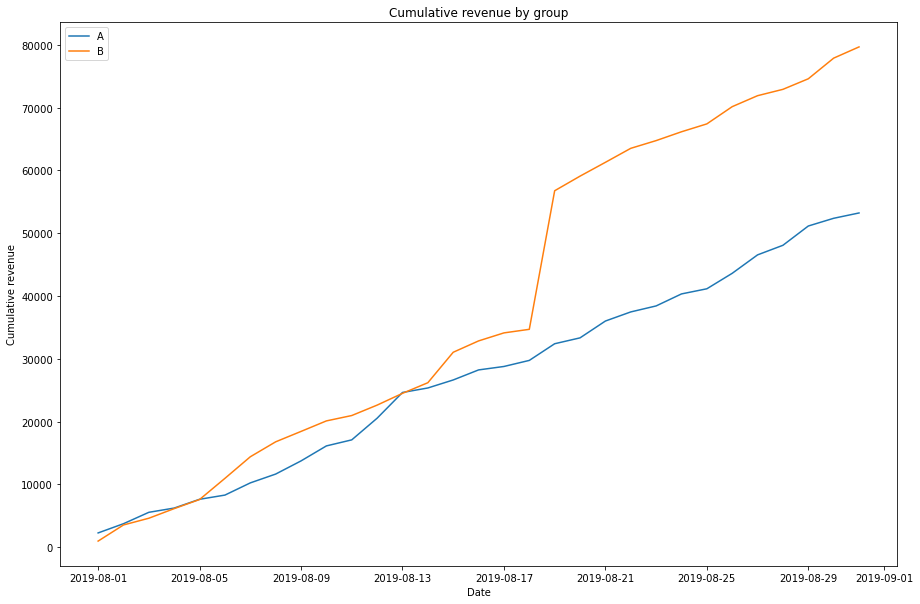

In [18]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Plotting graphs
plt.figure(figsize=(15,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Cumulative revenue by group')
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')

plt.show()

1. Revenue is rising throughout the whole test.
2. However, we can see that group B see a spikes in revenue after 2019-08-17. This may imply either a surge in the number of orders or the presence of very expensive orders in the sample. We'll check that later.

#### 2. Graph cumulative average order size by group


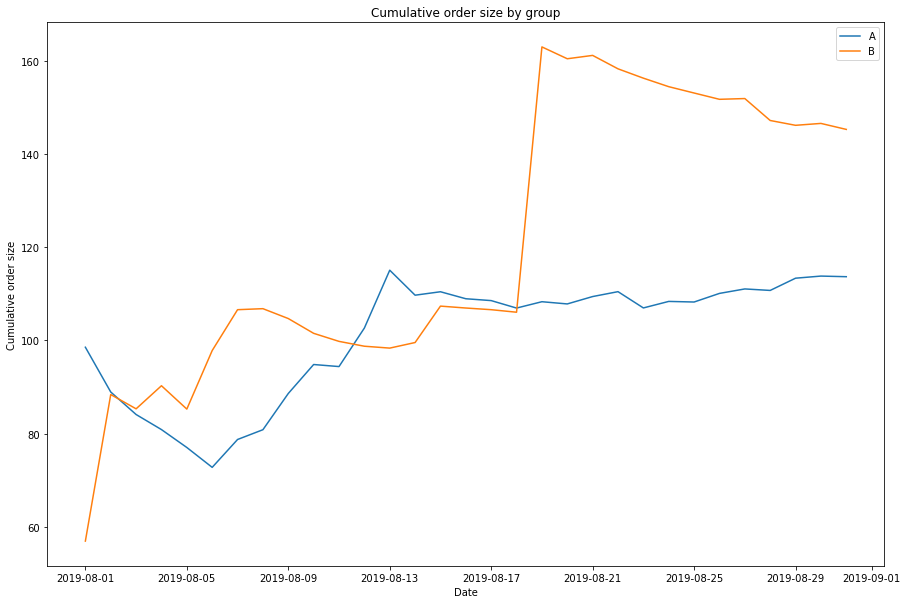

In [19]:
plt.figure(figsize=(15,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Cumulative order size by group')
plt.xlabel('Date')
plt.ylabel('Cumulative order size')
plt.show()

1. We can notice that the spike in cumulative revenue and average order size for group B coincide
2. The cumulative average order sizes are fluctuating. It's most likely too early to make decisions based on this metric or we need to analyze outliers, distorting the results.

#### 3. Graph the relative difference in cumulative average order size for group B compared with group A

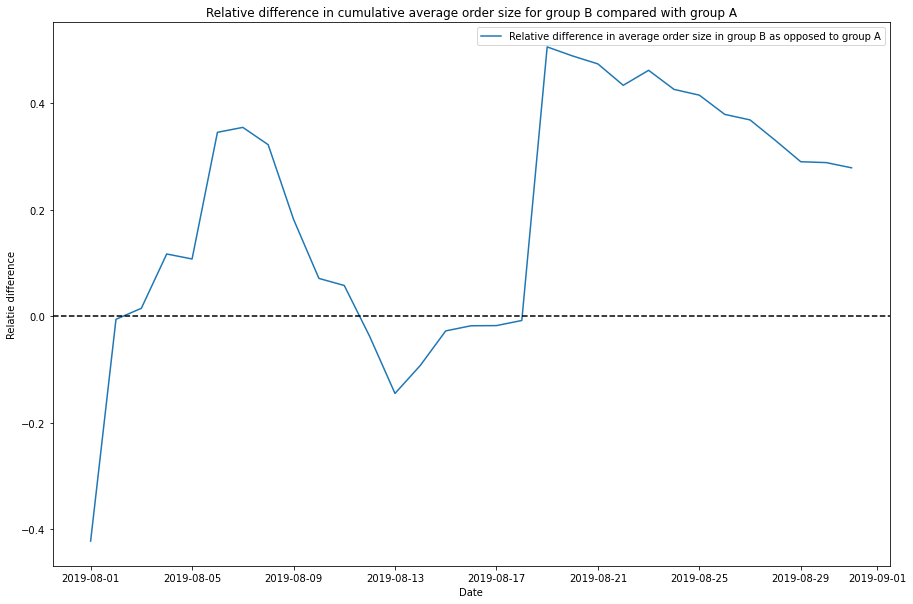

In [20]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize=(15,10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label="Relative difference in average order size in group B as opposed to group A")

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative average order size for group B compared with group A')
plt.xlabel('Date')
plt.ylabel('Relatie difference')
plt.legend()
plt.show()


There are differences between the segments spikes. This means there must be some big orders and outliers.

#### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference

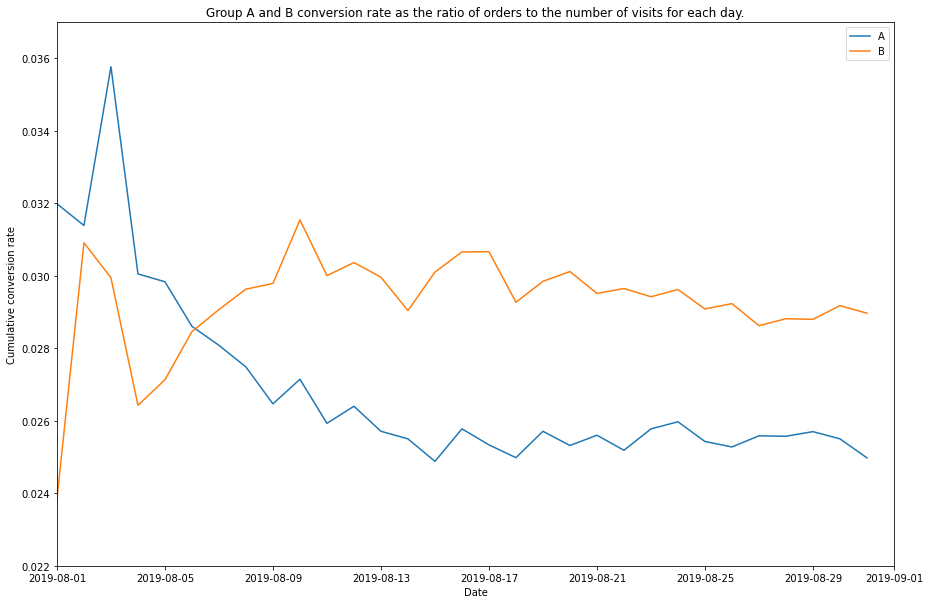

In [21]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(15,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis(["2019-08-01", '2019-09-01', 0.022, 0.037])
plt.title('Group A and B conversion rate as the ratio of orders to the number of visits for each day.')
plt.xlabel('Date')
plt.ylabel('Cumulative conversion rate')
plt.show()

At the beginning of the test segment A had a higher conversion, but then it gradually lowered and stabilized. Segment B stabilized at higher conversino rate than segment A

Let's plot a relative difference graph for the cumulative conversion rates:


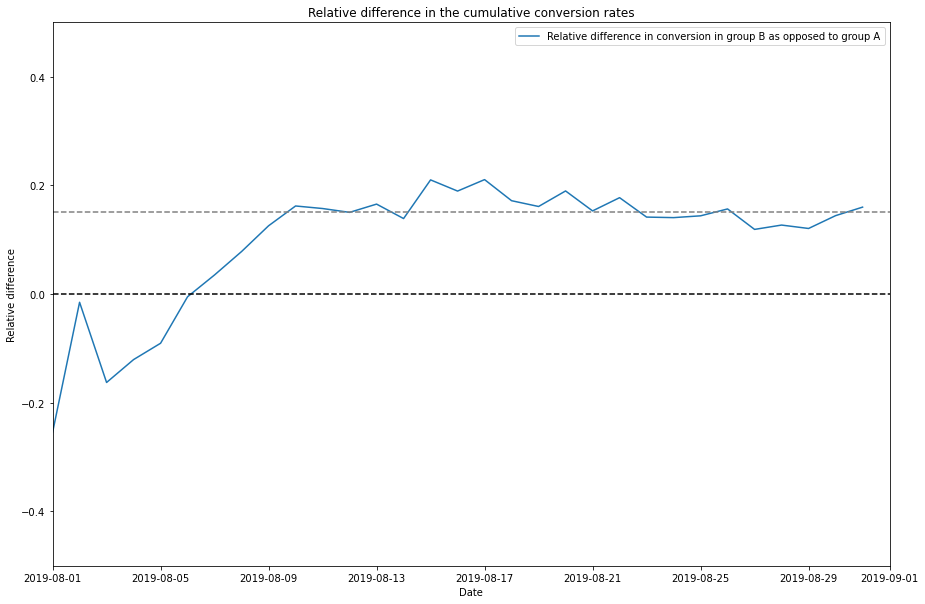

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative difference in conversion in group B as opposed to group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])
plt.title('Relative difference in the cumulative conversion rates')
plt.ylabel('Relative difference')
plt.xlabel('Date')
plt.show()

Group B lagged behind group A in the beginning but gained steadily and stabilized at around 15% higher than group A

#### 5. Plot a scatter chart of the number of orders per user


In [23]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)


,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


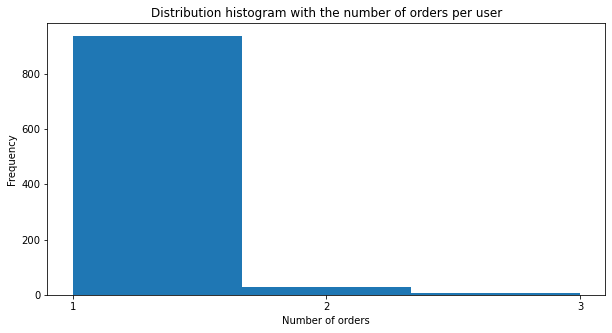

In [24]:
plt.figure(figsize=(10,5))
plt.title('Distribution histogram with the number of orders per user')
plt.xlabel('Number of orders')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 4, 1))
plt.hist(ordersByUsers['orders'], bins=3) 
plt.show()

Most of the users placed 1 order. Maximum number of orders is 3

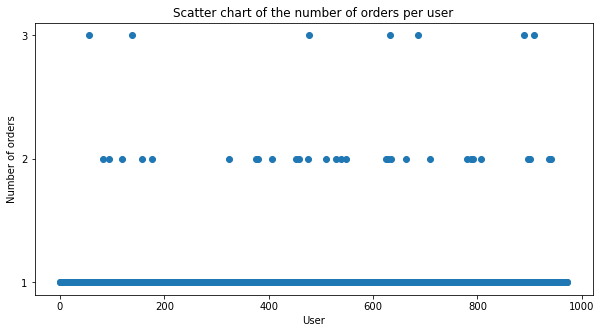

In [25]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Scatter chart of the number of orders per user')
plt.xlabel('User')
plt.ylabel('Number of orders')
plt.yticks(np.arange(1, 4, 1))
plt.show()

#### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [26]:
print('95th and 99th percentiles for the number of orders per user:', np.percentile(ordersByUsers['orders'], [95, 99])) 


95th and 99th percentiles for the number of orders per user: [1. 2.]


Less than 1% of users makes 3 orders. Let's consider 3 orders and more an anomaly.

#### 7. Plot a scatter chart of order prices. 

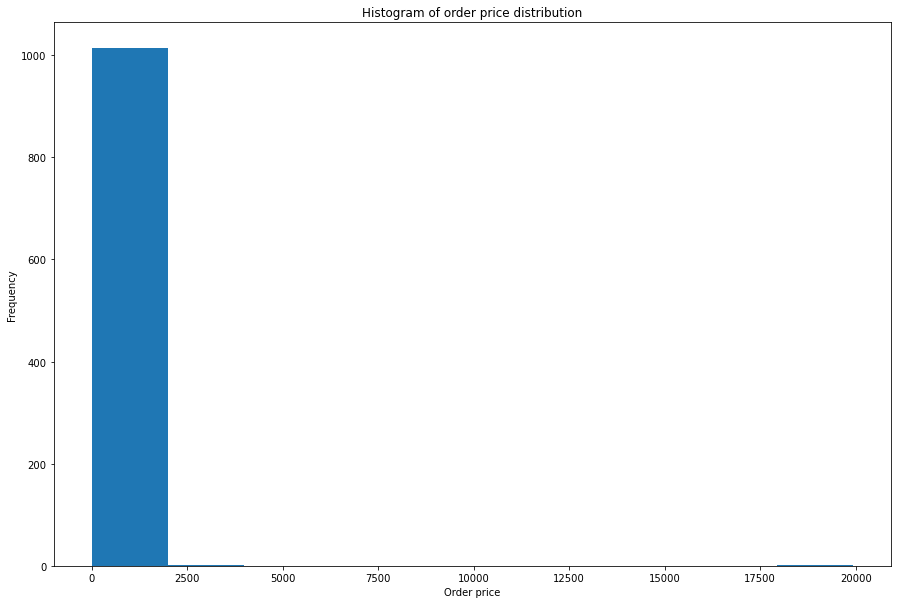

In [27]:
plt.figure(figsize=(15,10))
plt.hist(orders['revenue']) 
plt.title('Histogram of order price distribution')
plt.xlabel('Order price')
plt.ylabel('Frequency')
plt.show()

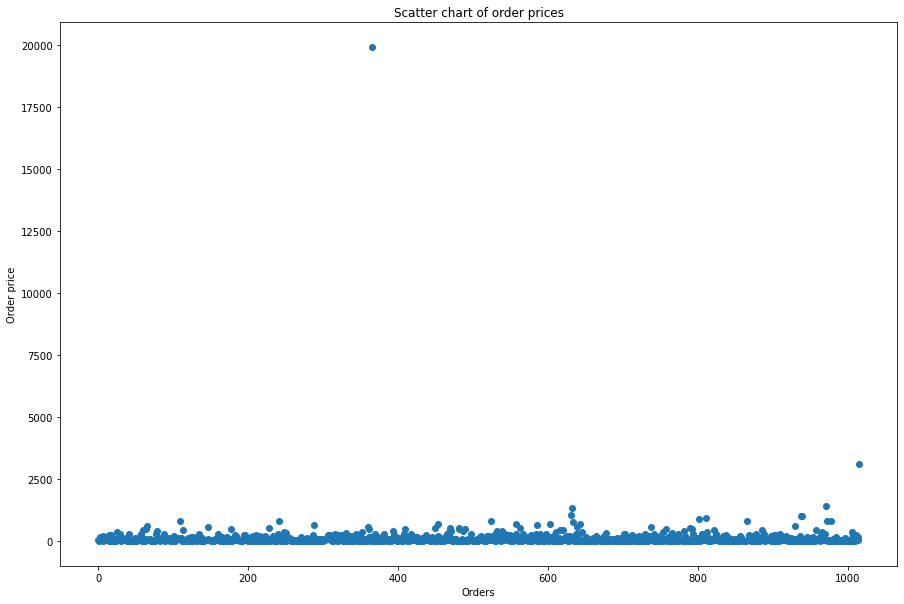

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15,10))
plt.scatter(x_values, orders['revenue']) 
plt.title('Scatter chart of order prices')
plt.xlabel('Orders')
plt.ylabel('Order price')
plt.show()


We can notice a couple of outliers.

#### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [29]:
print('95th and 99th percentiles of order prices:', np.percentile(orders['revenue'], [95, 99]))


95th and 99th percentiles of order prices: [414.275 830.3  ]


Not more than 5% of orders cost more than 414.3, and not more than 1% cost more than 830.3. 

Let's consider this 1% an anomaly.

## Measuring statistical significance <a id='ss'></a>

***For the tests below we will be using Mann-Whitney criterion and `alpha` = 0.05***

### Using raw data:

#### 9. Find the statistical significance of the difference in conversion between the groups using the raw data (before removing th anomalies)

Let's state the hypothesis and test whether we can reject it or not.

- **Hypothesis0:** "There is **no** statistically significant difference in conversion between the groups"
- **Hypothesis1:** "There is statistically significant difference in conversion between the groups"

In [30]:
# We'll create the variables ordersByUsersA and ordersByUsersB to store the columns ['userId', 'orders']. 
# For users with at least one order, we'll indicate the number of orders made.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'order_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [31]:
# Now we'll declare the variables sampleA and sampleB, with users from different groups
# and corresponding numbers of orders. Those who didn't order anything will have 0
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [32]:
print("P-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Relative change of group B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

P-value: 0.006
Relative change of group B: 0.160


P-value is less than 0.05.
Based on the results of the Mann-Whitney test:
- we can reject the **Hypothesis0:** "There is **no** statistically significant difference in conversion between the groups" 
- can accept the alternative **Hypothesis1:** "There is statistically significant difference in conversion between the groups"

Relative gain of group B in conversion is 16%.

#### 10. Find the statistical significance of the difference in average order size between the groups using the raw data

Let's state the hypothesis and test whether we can reject it or not.

- **Hypothesis0**: "There is **no** statistically significant difference in average order size between the groups"
- **Hypothesis1**: "There is statistically significant difference in average order size between the groups"

In [33]:
print("P-value: {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Relative difference of the order size for group B: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


P-value: 0.431
Relative difference of the order size for group B: 0.278


P-value is more than 0.05.
Based on the results of the Mann-Whitney test:
- we can't reject the **Hypothesis0:** "There is **no** statistically significant difference in average order size between the groups" 

Still, the average order size for group B is bigger than it is for group A.

### Using filtered data:

Let's find the total number of anomalous users, who bought more than 2 orders, or made orders more expensive than 830.3:

In [34]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 830.3]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
(16,)


We have found 16 abnormal users. Let's try to find out how their actions affected the test results

#### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data

Let's state the hypothesis and test whether we can reject it or not.

- **Hypothesis0:** "There is **no** statistically significant difference in conversion between the groups"
- **Hypothesis1:** "There is statistically significant difference in conversion between the groups"

In [35]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


In [36]:
print("P-value: {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Relative difference in conversion of group B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.004
Relative difference in conversion of group B: 0.189


P-value is less than 0.05.
Based on the results of the Mann-Whitney test:
- we can reject the **Hypothesis0:** "There is **no** statistically significant difference in conversion between the groups" 
- can accept the alternative **Hypothesis1:** "There is statistically significant difference in conversion between the groups"

Relative gain of group B in conversion is 19%.

Test results for conversion in raw and filtered data almost didn't change.

#### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data

In [37]:
print("P-value: {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("Relative difference of the order size for group B:: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value: 0.411
Relative difference of the order size for group B:: -0.032


P-value is more than 0.05.
Based on the results of the Mann-Whitney test:
- we can't reject the **Hypothesis0:** "There is **no** statistically significant difference in average order size between the groups" 

The average order size for group B is a bit less than it is for group A in the filtered data.

Comparing to the test results of the raw data:
- P-value decreased
- Relative difference of the order size for group B changed from 20% to -3%

## Conclusion<a id='conclusion'></a>

**Metrics analysis**
1. The graph showing the difference in conversion between the groups tells us that group B's results have stabilised and are much better than group A.
2. The graph showing the difference in average order size between the groups tells us that group B's results are better than group A. But this graph is distorted by anomalously expensive orders in group B. After filtering the data we've noticed that group B average order size is 3% smaller than in group A.


**Statistical test:**
1. Raw and filtered data revealed statistically significant differences in conversion between the groups. Group B shows 19% better conversion than group A.
2. No statistically significant differences were revealed in raw and filtered data in average order size between the groups.

**Decision based on the test results**

We would advise to stop the test and consider group B the leader. Even though average order size didn't increase, the conversion rates of group B rose significantly (19%) in comparison with group A. Which seems to be enough to conclude the test as successful.
